Running inference on image pairs
============================

If you want to use a pre-trained PWC-Net model on your own set of images, you can pass a list of image pairs to a `ModelPWCNet` object using its  `predict_from_img_pairs()` method, as demonstrated here.

Below, look for `TODO` references and customize this notebook based on your own needs.

In [1]:
"""
pwcnet_predict_from_img_pairs.ipynb

Run inference on a list of images pairs.

Written by Phil Ferriere

Licensed under the MIT License (see LICENSE for details)
"""
from __future__ import absolute_import, division, print_function
from copy import deepcopy
from skimage.io import imread
from skimage.color import rgba2rgb
from model_pwcnet import ModelPWCNet, _DEFAULT_PWCNET_TEST_OPTIONS
from visualize import display_img_pairs_w_flows
import os

In [2]:
# TODO: Set device to use for inference
# Here, we're using a GPU (use '/device:CPU:0' to run inference on the CPU)
gpu_devices = ['/device:GPU:0']  
controller = '/device:GPU:0'

# TODO: Set the path to the trained model (make sure you've downloaded it first from http://bit.ly/tfoptflow)
ckpt_path = 'D:\\AirSim simulator\\FDD\\Optical flow\\PWC-Net_TF\\tfoptflow\\models\\pwcnet-lg-6-2-multisteps-chairsthingsmix\\pwcnet.ckpt-595000'

In [250]:
# Build a list of image pairs to process
img_pairs = []
img_folder = "D:\\AirSim simulator\\FDD\\Optical flow\\PWC-Net_TF\\tfoptflow\\example_images\\Coen_city_256_144"
# img_folder = "D:\\AirSim simulator\\FDD\\Optical flow\\PWC-Net_TF\\tfoptflow\\example_images\\Coen_city_512_288"
# img_folder = "D:\\AirSim simulator\\FDD\\Optical flow\\PWC-Net_TF\\tfoptflow\\example_images\\Coen_City_1024_576"
# img_folder = "D:\\AirSim simulator\\FDD\\Optical flow\\PWC-Net_TF\\tfoptflow\\example_images\\Coen_City_1024_576_2"
# img_folder = "D:\\AirSim simulator\\FDD\\Optical flow\\PWC-Net_TF\\tfoptflow\\example_images\\Sintel_clean_ambush"
# img_folder = "D:\\AirSim simulator\\FDD\\Optical flow\\PWC-Net_TF\\tfoptflow\\example_images\\KITTI_2015"
# img_names = os.listdir(img_folder) 
# img_names = [j +".png" for j in sorted([i[:-4] for i in os.listdir(img_folder) ])]
img_names = sorted(os.listdir(img_folder))
img_distance = 200
start_img = 60
img_step = 1
img_number = 3
if "KITTI" in img_folder:
    img_step = 2
for i in range(start_img+1, start_img+1+img_number*img_step, img_step):
    image_path1 = os.path.join(img_folder, img_names[i+img_distance])
    image_path2 = os.path.join(img_folder, img_names[i-1])
    print(img_names[i+img_distance], img_names[i-1])
    image1, image2 = imread(image_path1), imread(image_path2)
    if image1.shape[2] == 4:
        #convert the image from RGBA2RGB
        image1 = rgba2rgb(image1)
    if image2.shape[2] == 4:
        #convert the image from RGBA2RGB
        image2 = rgba2rgb(image2)
    img_pairs.append((image1, image2))

1660032500073402624.png 1660032494266809088.png
1660032500102201600.png 1660032494297408000.png
1660032500129200640.png 1660032494324407040.png


In [251]:
# potato = [j +".png" for j in sorted([i[:-4] for i in img_names])]
# print(sorted(img_names))

In [255]:
# Configure the model for inference, starting with the default options
nn_opts = deepcopy(_DEFAULT_PWCNET_TEST_OPTIONS)
nn_opts['verbose'] = True
nn_opts['ckpt_path'] = ckpt_path
nn_opts['batch_size'] = 1
nn_opts['gpu_devices'] = gpu_devices
nn_opts['controller'] = controller
nn_opts['search_range'] = 10

# We're running the PWC-Net-large model in quarter-resolution mode
# That is, with a 6 level pyramid, and upsampling of level 2 by 4 in each dimension as the final flow prediction
nn_opts['use_dense_cx'] = True
nn_opts['use_res_cx'] = True
nn_opts['pyr_lvls'] = 6
nn_opts['flow_pred_lvl'] = 2

# The size of the images in this dataset are not multiples of 64, while the model generates flows padded to multiples
# of 64. Hence, we need to crop the predicted flows to their original size
nn_opts['adapt_info'] = (1, 436, 1024, 2)

In [256]:
# Instantiate the model in inference mode and display the model configuration
nn = ModelPWCNet(mode='test', options=nn_opts)
nn.print_config()

Building model...
... model built.
Loading model checkpoint D:\AirSim simulator\FDD\Optical flow\PWC-Net_TF\tfoptflow\models\pwcnet-lg-6-2-multisteps-chairsthingsmix\pwcnet.ckpt-595000 for eval or testing...

INFO:tensorflow:Restoring parameters from D:\AirSim simulator\FDD\Optical flow\PWC-Net_TF\tfoptflow\models\pwcnet-lg-6-2-multisteps-chairsthingsmix\pwcnet.ckpt-595000


InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [3,3,1021,128] rhs shape= [3,3,661,128]
	 [[Node: save/Assign_43 = Assign[T=DT_FLOAT, _class=["loc:@pwcnet/ctxt/dc_conv51/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](pwcnet/ctxt/dc_conv51/kernel, save/RestoreV2/_87)]]
	 [[Node: save/RestoreV2/_356 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_362_save/RestoreV2", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save/RestoreV2:178)]]

Caused by op 'save/Assign_43', defined at:
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
    ret = callback()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\contextvars\__init__.py", line 38, in run
    return callable(*args, **kwargs)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\contextvars\__init__.py", line 38, in run
    return callable(*args, **kwargs)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\contextvars\__init__.py", line 38, in run
    return callable(*args, **kwargs)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tornado\gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\contextvars\__init__.py", line 38, in run
    return callable(*args, **kwargs)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\IPython\core\interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\IPython\core\interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-256-3093120bc55e>", line 2, in <module>
    nn = ModelPWCNet(mode='test', options=nn_opts)
  File "D:\AirSim simulator\FDD\Optical flow\PWC-Net_TF\tfoptflow\model_pwcnet.py", line 231, in __init__
    super().__init__(name, mode, session, options)
  File "D:\AirSim simulator\FDD\Optical flow\PWC-Net_TF\tfoptflow\model_base.py", line 66, in __init__
    self.build_graph()
  File "D:\AirSim simulator\FDD\Optical flow\PWC-Net_TF\tfoptflow\model_base.py", line 266, in build_graph
    self.init_saver()
  File "D:\AirSim simulator\FDD\Optical flow\PWC-Net_TF\tfoptflow\model_base.py", line 119, in init_saver
    self.saver = tf.train.Saver()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\training\saver.py", line 1281, in __init__
    self.build()
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\training\saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\training\saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\training\saver.py", line 778, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\training\saver.py", line 419, in _AddRestoreOps
    assign_ops.append(saveable.restore(saveable_tensors, shapes))
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\training\saver.py", line 112, in restore
    self.op.get_shape().is_fully_defined())
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\ops\state_ops.py", line 216, in assign
    validate_shape=validate_shape)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 63, in assign
    use_locking=use_locking, name=name)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\jialv\anaconda3\envs\FDD\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [3,3,1021,128] rhs shape= [3,3,661,128]
	 [[Node: save/Assign_43 = Assign[T=DT_FLOAT, _class=["loc:@pwcnet/ctxt/dc_conv51/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](pwcnet/ctxt/dc_conv51/kernel, save/RestoreV2/_87)]]
	 [[Node: save/RestoreV2/_356 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_362_save/RestoreV2", _device="/job:localhost/replica:0/task:0/device:CPU:0"](save/RestoreV2:178)]]


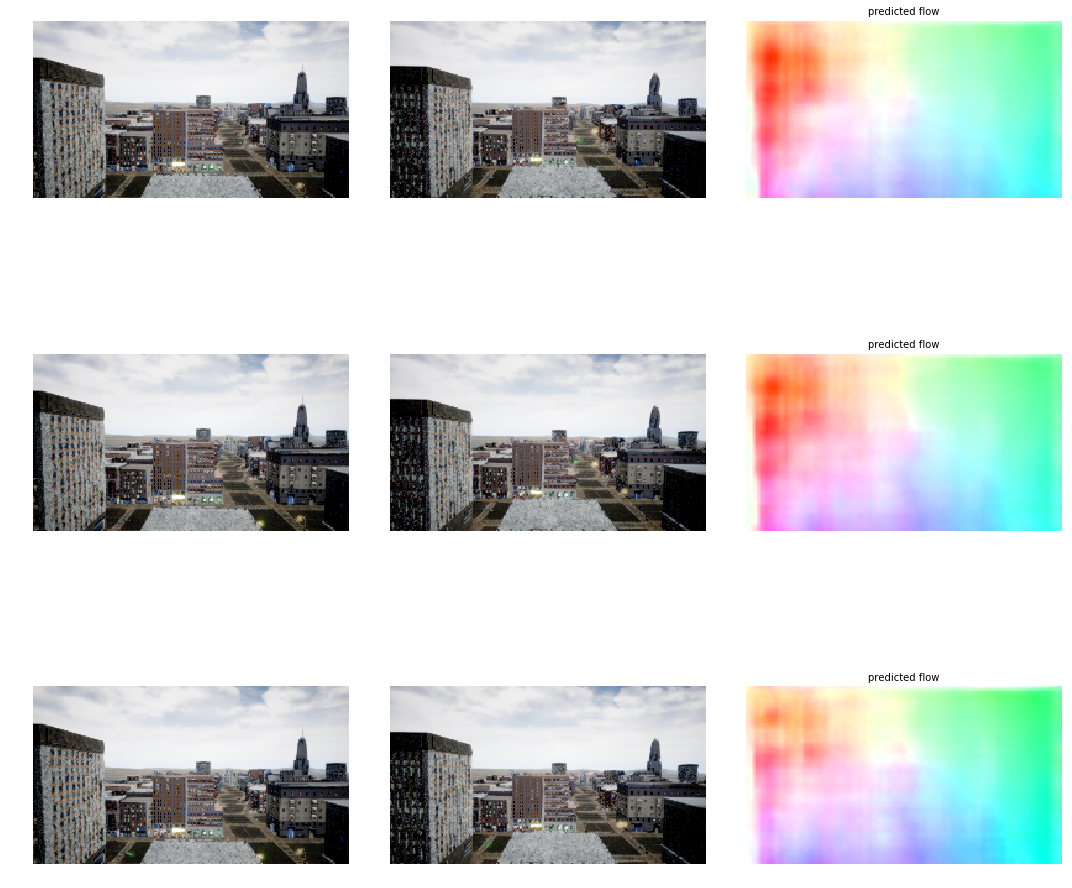

In [254]:
# Generate the predictions and display them
pred_labels = nn.predict_from_img_pairs(img_pairs, batch_size=1, verbose=False)
display_img_pairs_w_flows(img_pairs, pred_labels)

In [112]:
len(pred_labels[0]
   )


576

In [113]:
pred_labels[0]*10

array([[[   3.4212363, -107.26391  ],
        [   3.247875 , -107.20734  ],
        [   3.0745137, -107.150764 ],
        ...,
        [ -21.422464 , -105.88645  ],
        [ -21.422464 , -105.88645  ],
        [ -21.422464 , -105.88645  ]],

       [[   3.8009887, -121.4583   ],
        [   3.7457695, -122.94588  ],
        [   3.6905503, -124.43346  ],
        ...,
        [ -24.731052 , -117.70918  ],
        [ -24.731052 , -117.70918  ],
        [ -24.731052 , -117.70918  ]],

       [[   4.1807413, -135.65271  ],
        [   4.2436643, -138.68442  ],
        [   4.3065867, -141.71614  ],
        ...,
        [ -28.039637 , -129.53192  ],
        [ -28.039637 , -129.53192  ],
        [ -28.039637 , -129.53192  ]],

       ...,

       [[  38.21299  ,  -93.826614 ],
        [  45.514297 , -112.00035  ],
        [  52.81561  , -130.17407  ],
        ...,
        [ -65.44714  , -164.12874  ],
        [ -65.44714  , -164.12874  ],
        [ -65.44714  , -164.12874  ]],

       [[  38.2